<a href="https://colab.research.google.com/github/yashraj02/Data-Science-Projects/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import statistics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Data Science/Titanic/titanic.csv')
dataset.set_index('PassengerId',inplace=True)

In [0]:
#Data Cleaning
dataset.iloc[:,-1].fillna(statistics.mode(dataset.iloc[:,-1]),inplace=True) #embarked NaN to mode
dataset.iloc[:,4].fillna(np.nanmedian(dataset.iloc[:,4]),inplace=True) #age NaN to median

#-------------------------------------------
#Extracting from Name
new = dataset['Name'].str.split(", ", n=1, expand=True)[1]
new = new.str.split(" ",n=0,expand=True)[0]
print(new.unique())

dataset.loc[dataset['Name'].str.contains('Mr.', case=False), 'Title'] = 'Mr'
dataset.loc[dataset['Name'].str.contains('Mrs.', case=False), 'Title'] = 'Mrs'
dataset.loc[dataset['Name'].str.contains('Miss.', case=False), 'Title'] = 'Miss'
dataset.loc[dataset['Name'].str.contains('Master.', case=False), 'Title'] = 'Master'
dataset.loc[dataset['Name'].str.contains('Mme.', case=False), 'Title'] = 'Mrs'
dataset.loc[dataset['Name'].str.contains('Ms.', case=False), 'Title'] = 'Miss'
dataset.loc[dataset['Name'].str.contains('Mlle.', case=False), 'Title'] = 'Miss'
dataset.loc[dataset['Name'].str.contains('Don.', case=False), 'Title'] = 'Rare'
dataset.loc[dataset['Name'].str.contains('Rev.', case=False), 'Title'] = 'Rare'
dataset.loc[dataset['Name'].str.contains('Dr.', case=False), 'Title'] = 'Rare'
dataset.loc[dataset['Name'].str.contains('Major.', case=False), 'Title'] = 'Rare'
dataset.loc[dataset['Name'].str.contains('Lady.', case=False), 'Title'] = 'Rare'
dataset.loc[dataset['Name'].str.contains('Sir.', case=False), 'Title'] = 'Rare'
dataset.loc[dataset['Name'].str.contains('Col.', case=False), 'Title'] = 'Rare'
dataset.loc[dataset['Name'].str.contains('Capt.', case=False), 'Title'] = 'Rare'
dataset.loc[dataset['Name'].str.contains('the.', case=False), 'Title'] = 'Rare'
dataset.loc[dataset['Name'].str.contains('Jonkheer.', case=False), 'Title'] = 'Rare'

titles = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
dataset['Title'] = dataset['Title'].map(titles)
dataset

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'the' 'Jonkheer.']


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,5
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,5


In [0]:
dataset['Cabin_Code'] = dataset['Cabin'].astype(str).str[0]

In [0]:
# Age range 
pd.qcut(dataset['Age'], q=6)
dataset['Age'] = dataset['Age']
dataset.loc[dataset['Age']<=19, 'AgeRange'] = 1
dataset.loc[(dataset['Age']>19) & (dataset['Age']<=25), 'AgeRange'] = 2
dataset.loc[(dataset['Age']>25) & (dataset['Age']<=28), 'AgeRange'] = 3
dataset.loc[(dataset['Age']>28) & (dataset['Age']<=31), 'AgeRange'] = 4
dataset.loc[(dataset['Age']>31) & (dataset['Age']<=41), 'AgeRange'] = 5
dataset.loc[dataset['Age']>31, 'AgeRange'] = 6

In [0]:
# Cabin to Deck
deck = {'n':0, 'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8}
dataset['Cabin_Code'] = dataset['Cabin_Code'].map(deck)
dataset = dataset.drop('Cabin',axis=1)

In [0]:
# Relatives & Alone or Not
dataset['Relatives'] = dataset['Parch'] + dataset['SibSp']
dataset.loc[dataset['Relatives']>0, 'Alone'] = 0
dataset.loc[dataset['Relatives']==0, 'Alone'] = 1

In [0]:
# Turning Fare in range of 1 to 3
# pd.qcut(dataset['Fare'], q=3)
dataset.loc[dataset['Fare']<=8.662, 'Fare'] = 1
dataset.loc[(dataset['Fare']>8.662) & (dataset['Fare']<=26), 'Fare'] = 2
dataset.loc[(dataset['Fare']>26) & (dataset['Fare']<=512.5), 'Fare'] = 3
dataset['Fare_PP'] = (dataset['Relatives']+1)/dataset['Fare']

In [0]:
sex = {'male':0,'female':1}
dataset['Sex'] = dataset['Sex'].map(sex)

In [0]:
print(dataset[(dataset['Embarked']=='Q') & (dataset['Survived']==1)].count()[0])
print(dataset[(dataset['Embarked']=='C') & (dataset['Survived']==1)].count()[0])
print(dataset[(dataset['Embarked']=='S') & (dataset['Survived']==1)].count()[0])
embarked = {'Q':1,'C':2,'S':3}
dataset['Embarked'] = dataset['Embarked'].map(embarked)

30
93
219


In [0]:
dataset.drop(['Name','Ticket','Age'], axis=1, inplace=True)

In [0]:
dataset

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Cabin_Code,AgeRange,Relatives,Alone,Fare_PP
PassengerId,,,,,,,,,,,,,
1,0,3,0,1,0,1.0,3,1,0,2.0,1,0.0,2.000000
2,1,1,1,1,0,3.0,2,3,3,6.0,1,0.0,0.666667
3,1,3,1,0,0,1.0,3,2,0,3.0,0,1.0,1.000000
4,1,1,1,1,0,3.0,3,3,3,6.0,1,0.0,0.666667
5,0,3,0,0,0,1.0,3,1,0,6.0,0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,0,0,2.0,3,5,0,3.0,0,1.0,0.500000
888,1,1,1,0,0,3.0,3,2,2,1.0,0,1.0,0.333333
889,0,3,1,1,2,2.0,3,5,0,3.0,3,0.0,2.000000


In [0]:
#Scaling
dataset.columns
x = dataset[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Cabin_Code', 'AgeRange', 'Relatives', 'Alone',
       'Fare_PP']]  #, 'Age'
y = dataset[['Survived']]

scalar = MinMaxScaler()
scalar.fit(x)
x = scalar.transform(x)

In [0]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [0]:
#Logistic Reg
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train.values.ravel())
y_pred = log_reg.predict(x_test)
# print(confusion_matrix(y_test,y_pred,labels=[0,1]))
# print(classification_report(y_test,y_pred))
# print("Accuracy of Logistic Reg:{:.2f}".format(log_reg.score(x_test,y_test)))
acc_log_reg = log_reg.score(x_train,y_train.values.ravel())
print(acc_log_reg)

0.8070469798657718


In [0]:
gnb = GaussianNB()
gnb.fit(x_train,y_train.values.ravel())
y_pred = gnb.predict(x_test)
# temp = y_test.values.ravel()
# print(confusion_matrix(y_test,y_pred,labels=[0,1]))
# print(classification_report(y_test,y_pred))
# print(np.mean(cross_val_score(gnb, x_train, y_train.values.ravel(), cv=10)))
acc_gnb = gnb.score(x_train,y_train.values.ravel())
print(acc_gnb)

0.7701342281879194


In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train.values.ravel())
y_pred = lda.predict(x_test)
# print(confusion_matrix(y_test.values.ravel(),y_pred,labels=[0,1]))
# print(classification_report(y_test,y_pred))
# print(np.mean(cross_val_score(clf, x_train, y_train.values.ravel(), cv=10)))
acc_lda = lda.score(x_train,y_train.values.ravel())
print(acc_lda)

0.8036912751677853


In [0]:
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
# print(confusion_matrix(y_test.values.ravel(),y_pred,labels=[0,1]))
# print(classification_report(y_test.values.ravel(),y_pred))
# print(np.mean(cross_val_score(clf, x_train, y_train.values.ravel(), cv=10)))
acc_svc = svc.score(x_train,y_train.values.ravel())
print(acc_svc)

0.7869127516778524


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train.values.ravel())
y_pred = qda.predict(x_test)
# print(confusion_matrix(y_test.values.ravel(),y_pred,labels=[0,1]))
# print(classification_report(y_test.values.ravel(),y_pred))
# print(np.mean(cross_val_score(clf, x_train, y_train.values.ravel(), cv=10)))
acc_qda = qda.score(x_train,y_train.values.ravel())
print(acc_qda)

0.7802013422818792


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train.values.ravel())
y_pred = knn.predict(x_test)
# print(confusion_matrix(y_test.values.ravel(),y_pred,labels=[0,1]))
# print(classification_report(y_test.values.ravel(),y_pred))
# print(np.mean(cross_val_score(neigh, x_train, y_train.values.ravel(), cv=10)))
acc_knn = knn.score(x_train,y_train.values.ravel())
print(acc_knn)

0.8322147651006712


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
# print(confusion_matrix(y_test.values.ravel(),y_pred,labels=[0,1]))
# print(classification_report(y_test.values.ravel(),y_pred))
#np.mean(cross_val_score(clf, x_train, y_train, cv=10))
acc_dt = dt.score(x_train,y_train.values.ravel())
print(acc_dt)

0.9194630872483222


In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) #,max_depth=2, random_state=0 
rf.fit(x_train, y_train.values.ravel())
# print(clf.feature_importances_)
y_pred = rf.predict(x_test)
# print(confusion_matrix(y_test.values.ravel(),y_pred,labels=[0,1]))
# print(classification_report(y_test.values.ravel(),y_pred))
# np.mean(cross_val_score(clf, x_train, y_train.values.ravel(), cv=10))
acc_rf = rf.score(x_train,y_train.values.ravel())
print(acc_rf)

0.9194630872483222


In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(x_train, y_train.values.ravel())
y_pred = mlp.predict(x_test)
# print(confusion_matrix(y_test.values.ravel(),y_pred,labels=[0,1]))
# print(classification_report(y_test.values.ravel(),y_pred))
# np.mean(cross_val_score(clf, x_train, y_train.values.ravel(), cv=10))
acc_mlp = mlp.score(x_train,y_train)
print(acc_mlp)

0.8557046979865772


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [0]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train.values.ravel())
Y_pred = sgd.predict(x_test)
sgd.score(x_train, y_train.values.ravel())
acc_sgd = sgd.score(x_train, y_train.values.ravel())
print(acc_sgd)

0.43791946308724833


In [0]:
scores = {
    'Model':['LogisticRegression','GaussianNB','LinearDiscriminantAnalysis','SVC',
                    'QuadraticDiscriminantAnalysis','KNeighborsClassifier','DecisionTreeClassifier',
                    'RandomForestClassifier','MLPClassifier','SGDClassifier'],
    'Score':[acc_log_reg,acc_gnb,acc_lda,acc_svc,acc_qda,acc_knn,acc_dt,acc_rf,acc_mlp,acc_sgd]
           }
results = pd.DataFrame(scores)
results = results.set_index('Score')
results_df = results.sort_values(by='Score', ascending=False)
results_df

,Model
Score,
0.919463,DecisionTreeClassifier
0.919463,RandomForestClassifier
0.855705,MLPClassifier
0.832215,KNeighborsClassifier
0.807047,LogisticRegression
0.803691,LinearDiscriminantAnalysis
0.786913,SVC
0.780201,QuadraticDiscriminantAnalysis
0.770134,GaussianNB


In [0]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Scores: [0.68333333 0.86666667 0.8        0.83333333 0.83333333 0.68333333
 0.83050847 0.83050847 0.77966102 0.89830508]
Mean: 0.8038983050847458
Standard Deviation: 0.06758403585456225


In [0]:
#adding column names to x again
x = pd.DataFrame(x_train, columns = [['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Cabin_Code', 'AgeRange', 'Relatives', 'Alone',
       'Fare_PP']])

In [0]:
importances = pd.DataFrame({'feature':['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Cabin_Code', 'AgeRange', 'Relatives', 'Alone','Fare_PP'], 
       'importance': np.round(rf.feature_importances_,3)})
# importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
# importances_df = importances.sort_values('importance',ascending=False)
# importances_df
importances.sort_values(inplace=True, ascending=False, by='importance')
importances

,feature,importance
1,Sex,0.289
6,Title,0.226
0,Pclass,0.114
7,Cabin_Code,0.086
11,Fare_PP,0.055
9,Relatives,0.052
4,Fare,0.048
8,AgeRange,0.046
5,Embarked,0.033
2,SibSp,0.020


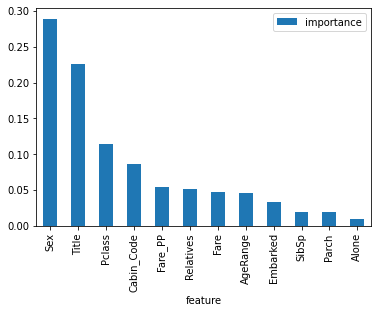

In [0]:
importances.plot.bar(x='feature')

In [0]:
#removing alone
x = dataset[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Cabin_Code', 'AgeRange', 'Relatives',
       'Fare_PP']]  #, 'Age'
y = dataset[['Survived']]

scalar = MinMaxScaler()
scalar.fit(x)
x = scalar.transform(x)

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

rf = RandomForestClassifier(n_estimators=100) #,max_depth=2, random_state=0
rf.fit(x_train, y_train.values.ravel())


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(x_train, y_train)
Y_prediction = random_forest.predict(x_test)

print(random_forest.score(x_train, y_train))

acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")
print("oob score: ",round(random_forest.oob_score_,4)*100,"%")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9194630872483222
91.95 %
oob score:  79.19 %


In [0]:
# param_grid = {"criterion":["gini","entropy"], 
#               "min_samples_leaf":[1,5,10,25,50,70],
#               "min_samples_split":[2,4,10,12,16,18,25,35],
#               "n_estimators":[100,400,700,1000,1500]}

# from sklearn.model_selection import GridSearchCV, cross_val_score
# rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
# clf.fit(x_train,y_train)
# clf.best_params_

In [0]:
rf = RandomForestClassifier(criterion = 'gini',
                                      min_samples_leaf = 5,
                                      min_samples_split = 2,
                                      n_estimators = 100,
                                      max_features = 'auto',
                                       oob_score = True,
                                       random_state = 1,
                                       n_jobs = -1)
rf.fit(x_train, y_train)
Y_prediction = rf.predict(x_test)
rf.score(x_train, y_train)
print("oob score:", round(rf.oob_score_, 4)*100, "%")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


oob score: 81.38 %


In [0]:
from sklearn.metrics import precision_score, recall_score
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))

Precision:  0.8148148148148148
Recall:  0.7333333333333333


In [0]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7719298245614035

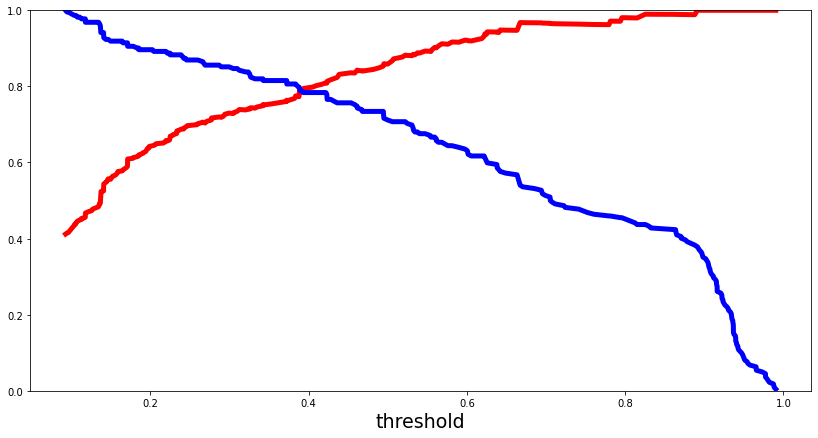

In [0]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
#getting prob of out predictions
y_scores = rf.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train,y_scores)

def plot_precision_and_recall(precision,recall,threshold):
  plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
  plt.plot(threshold, recall[:-1], "b", label="precision", linewidth=5)
  plt.xlabel("threshold", fontsize=19)
  plt.ylim([0,1])

plt.figure(figsize=(14,7))
plot_precision_and_recall(precision,recall,threshold)
plt.show()

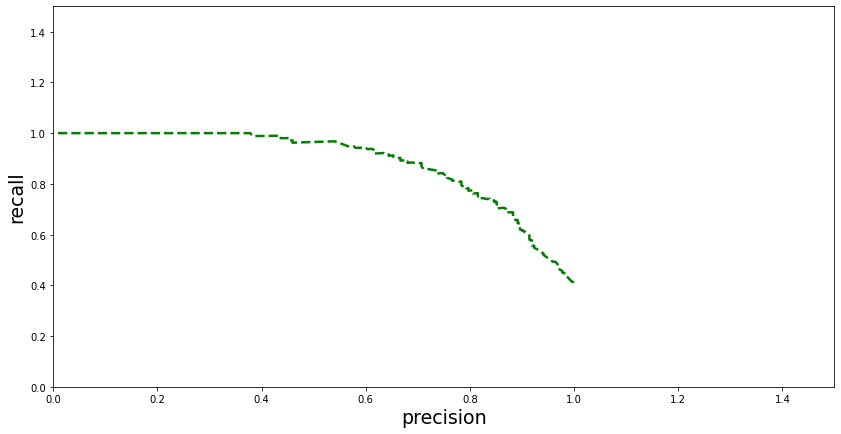

In [0]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

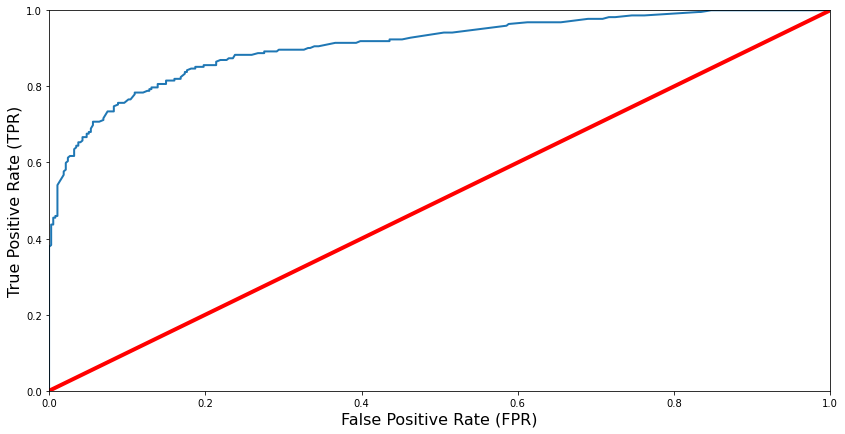

In [0]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9081454449101508
